# LinearRegression Model  with SciKit-Learn
**Building an advertizing campaign profit predictor model**

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [93]:
df = pd.read_csv("50_Startups.csv")

## Data incites (columns, rows, correlations etc) and preprocessing 

In [185]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [95]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [96]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [98]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [99]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

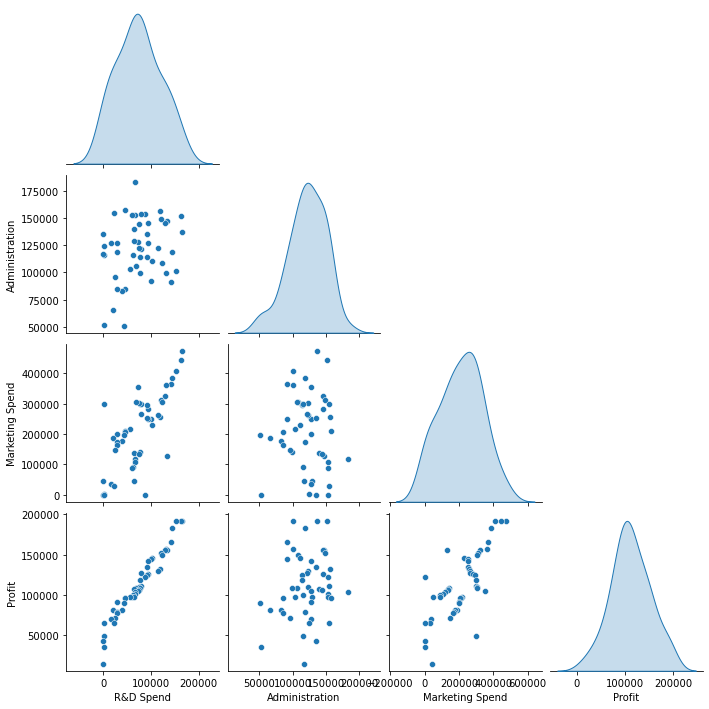

In [101]:
sns.pairplot(data=df, diag_kind='kde',corner=True)

## Feature and label selections from entire data frame

In [102]:
X = df. drop(['Profit', 'State'],axis=1)
y = df['Profit']

In [103]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [104]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

## Import Train_Test_Split to partision the data into train and test sets

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [107]:
X_train

,R&D Spend,Administration,Marketing Spend
16,78013.11,121597.55,264346.06
24,77044.01,99281.34,140574.81
7,130298.13,145530.06,323876.68
45,1000.23,124153.04,1903.93
18,91749.16,114175.79,294919.57
3,144372.41,118671.85,383199.62
41,27892.92,84710.77,164470.71
30,61994.48,115641.28,91131.24
15,114523.61,122616.84,261776.23
20,76253.86,113867.30,298664.47


In [108]:
y_train

16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
3     182901.99
41     77798.83
30     99937.59
15    129917.04
20    118474.03
43     69758.98
38     81229.06
44     65200.33
39     81005.76
10    146121.95
49     14681.40
25    107404.34
33     96778.92
36     90708.19
2     191050.39
27    105008.31
34     96712.80
35     96479.51
8     152211.77
19    122776.86
29    101004.64
12    141585.52
5     156991.12
0     192261.83
28    103282.38
4     166187.94
40     78239.91
13    134307.35
9     149759.96
48     35673.41
23    108733.99
6     156122.51
17    125370.37
11    144259.40
31     97483.56
Name: Profit, dtype: float64

In [109]:
X_test

,R&D Spend,Administration,Marketing Spend
37,44069.95,51283.14,197029.42
14,119943.24,156547.42,256512.92
21,78389.47,153773.43,299737.29
32,63408.86,129219.61,46085.25
22,73994.56,122782.75,303319.26
1,162597.70,151377.59,443898.53
26,75328.87,144135.98,134050.07
46,1315.46,115816.21,297114.46
42,23640.93,96189.63,148001.11
47,0.00,135426.92,0.00


In [110]:
y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
Name: Profit, dtype: float64

## Import Machine Learning model of Choice, develop the predictor model, train and use it to predict the label value 

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
Profit_predictor = LinearRegression() 

In [113]:
Profit_predictor.fit(X_train,y_train)

LinearRegression()

In [114]:
Pred_Profit = Profit_predictor.predict(X_test)

In [115]:
Pred_Profit

array([ 88287.41062646, 151438.84017595, 120537.82823503,  99289.67306481,
       116699.81127514, 191366.93722057, 112014.78869329,  59669.24898719,
        71369.19151394,  48282.09608943])

## Investigate predictor model  performance using desired meterics 

### Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [116]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [117]:
MAE = mean_absolute_error(y_test,Pred_Profit)
MSE = mean_squared_error(y_test,Pred_Profit)
RMSE = np.sqrt(MSE)

In [118]:
MAE

6066.865715986149

In [119]:
RMSE

8138.902237083221

In [128]:
df['Profit'].mean()

112012.63920000002

## Train model with the entire data set when you are certain of its performance keeping all hyper parameters constant as used during the split training stage.

In [152]:
Final_Profit_model = LinearRegression()

In [153]:
Final_Profit_model.fit(X,y)

LinearRegression()

In [156]:
Final_Pred_Profit = Final_Profit_model.predict(X)

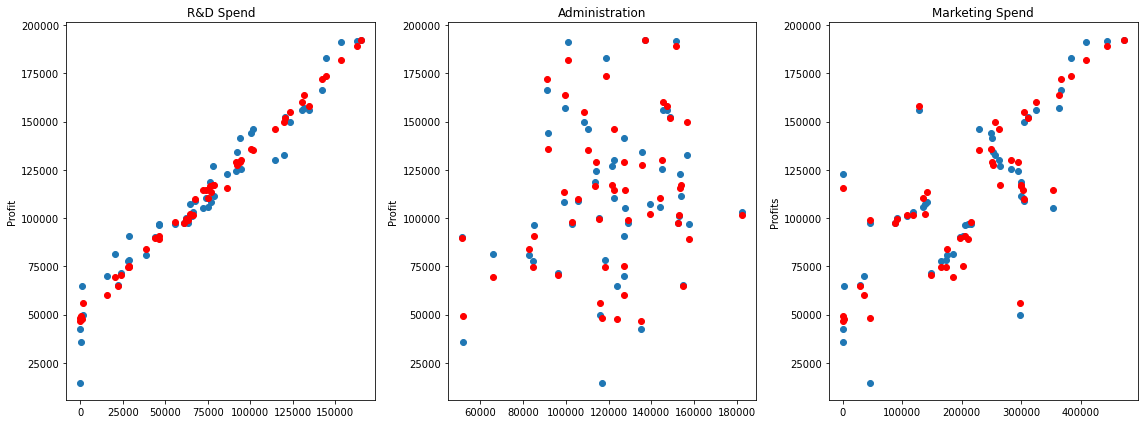

In [160]:
# Visualization of redicted vs true y values ..... Done only because features are small but not applicable otherwise 

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['R&D Spend'],df['Profit'],'o')
axes[0].plot(df['R&D Spend'],Final_Pred_Profit,'o',color='red')
axes[0].set_ylabel("Profit")
axes[0].set_title("R&D Spend")

axes[1].plot(df['Administration'],df['Profit'],'o')
axes[1].plot(df['Administration'],Final_Pred_Profit,'o',color='red')
axes[1].set_title("Administration")
axes[1].set_ylabel("Profit")

axes[2].plot(df['Marketing Spend'],df['Profit'],'o')
axes[2].plot(df['Marketing Spend'],Final_Pred_Profit,'o',color='red')
axes[2].set_title("Marketing Spend");
axes[2].set_ylabel("Profits")
plt.tight_layout();

## Verify if the Linear model was appropriate using residuals 

In [ ]:
residuals = Final_Pred_Profit - y

<AxesSubplot:xlabel='Profit', ylabel='Density'>

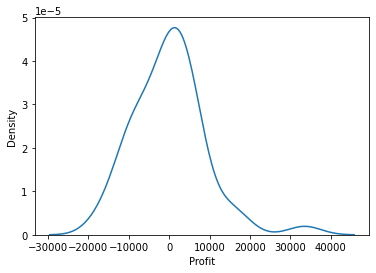

In [163]:
sns.kdeplot(data = residuals)

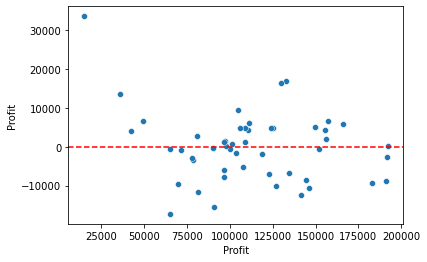

In [161]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

## Obtain the coefficients from the final prepared model

In [166]:
Final_Profit_model.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [170]:
coeff_df = pd.DataFrame(Final_Profit_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.805715
Administration,-0.026816
Marketing Spend,0.027228


## Use Model to predict using new unknown data (Model utilization)

In [176]:
campaign = [[162597.70,151377.59,443898.53]]

In [177]:
Final_Profit_model.predict(campaign)

array([189156.76823227])

## Model Persistence (Saving and Loading a Model) 

In [186]:
from joblib import dump, load

In [187]:
dump(Final_Profit_model, 'Profit_Predictor_Model.joblib') 

['Profit_Predictor_Model.joblib']

In [189]:
loaded_model = load('Profit_Predictor_Model.joblib')

In [194]:
np.round(loaded_model.predict(campaign), 2)

array([189156.77])

# Polynomial Regression with SciKit-Learn

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
df1 = pd.read_csv("50_Startups.csv")

In [306]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Feature and label selections from entire data frame

In [307]:
X = df. drop(['Profit', 'State'],axis=1)
y = df['Profit']

## Introducing Polynomial feature to the data (polynomial degree) 

In [308]:
from sklearn.preprocessing import PolynomialFeatures

In [309]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [310]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features_X = polynomial_converter.fit_transform(X)

In [311]:
X.shape    # Before undergoing polynomial transformation 

(50, 3)

In [312]:
poly_features_X.shape  # the features in X has been transform from 3 to 9 (which includes the interaction terms)

(50, 9)

In [313]:
X.iloc[0]     # checking the features in the first row in X (the untransformed)

R&D Spend          165349.2
Administration     136897.8
Marketing Spend    471784.1
Name: 0, dtype: float64

In [314]:
poly_features_X [0]     # checking the features in the first row in X (the transformed)

array([1.65349200e+05, 1.36897800e+05, 4.71784100e+05, 2.73403579e+10,
       2.26359417e+10, 7.80091235e+10, 1.87410076e+10, 6.45862054e+10,
       2.22580237e+11])

In [315]:
poly_features_X[0][:3]

array([165349.2, 136897.8, 471784.1])

## Import Train_Test_Split to partision the data into train and test sets

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(poly_features_X, y, test_size=0.2, random_state=101)

## Import model for fitting on Polynomial Data

## Create an instance of the model with parameters

## Fit the training data to the model

## and use it to predict the label value  using the y_test values by imputing just X_test values

In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
Polynomial_model = LinearRegression(fit_intercept=True)

In [269]:
#from sklearn.preprocessing import StandardScaler

# sklearn.preprocessing.StandardScaler : to normalized the values before fitting to model

# scaler = StandardScaler()

In [320]:
Polynomial_model.fit(X_train,y_train)

LinearRegression()

In [321]:
Pred_Profit = Polynomial_model.predict(X_test)

## Investigate predictor model  performance using desired meterics 

In [322]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [323]:
MAE = mean_absolute_error(y_test,Pred_Profit)
MSE = mean_squared_error(y_test,Pred_Profit)
RMSE = np.sqrt(MSE)

In [324]:
MAE

6189.311225424172

In [325]:
RMSE

7678.9678452947755

---
---
## Choosing a Model

### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [241]:
# TRAINING ERROR PER DEGREE (empty list)
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features_X = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features_X, y, test_size=0.2, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    Polynomial_model = LinearRegression(fit_intercept=True)
    Polynomial_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = Polynomial_model.predict(X_train)
    test_pred = Polynomial_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

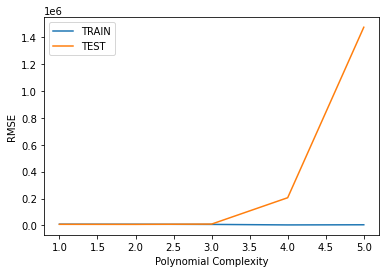

In [255]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim()
plt.legend()

### Comparison with Simple Linear Regression

 ** Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 6066.865
    * RMSE: 8138.90

* Polynomial 2-degree:
    * MAE: 6189.31
    * RMSE: 7678.97

* Polynomial 3-degree:
    * MAE: 7800.29
    * RMSE: 9954.49    
    

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [329]:
# Based on our chart, should be degree=2 
# it is better to be on the safe side of complexity
Final_polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [330]:
final_polynomial_model = LinearRegression()

In [331]:
final_polynomial_model.fit(Final_polynomial_converter.fit_transform(X),y)

LinearRegression()

### Saving Model and Converter

In [332]:
from joblib import dump, load

In [333]:
dump(final_polynomial_model, 'profit_polynomial_model.joblib') 

['profit_polynomial_model.joblib']

In [334]:
dump(Final_polynomial_converter,'profit_polynomial_converter.joblib')

['profit_polynomial_converter.joblib']

## Deployment and Predictions

In [335]:
loaded_poly_converter = load('profit_polynomial_converter.joblib')
loaded_poly_model = load('profit_polynomial_model.joblib')

In [ ]:
campaign = [[162597.70,151377.59,443898.53]]

In [336]:
campaign_poly = loaded_poly_converter.transform(campaign)

In [337]:
campaign_poly

array([[1.62597700e+05, 1.51377590e+05, 4.43898530e+05, 2.64380120e+10,
        2.46136480e+10, 7.21768800e+10, 2.29151748e+10, 6.71962897e+10,
        1.97045905e+11]])

In [339]:
loaded_poly_model.predict(campaign_poly)

array([184564.16521081])

### Comparison with Simple Linear Regression and the polynomial regression (degree 2) for the same campaign

 ** Results on the Test Set (Note: Use the same Random Split to fairly compare!)**
 #### campaign: R&D Spend (162597.70), Administration (151377.59), Marketing Spend (443898.53)

* Simple Linear Regression:
    
    * Estimated Profit: 189156.768
    * RMSE: 8138.90

* Polynomial 2-degree:
    * Estimated Profit: 184564.165
    * RMSE: RMSE: 7678.97

  